In [1]:
# basic dependencies

import numpy as np
from numpy import loadtxt
from numpy import savetxt

import pandas as pd
import math
import time

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

###########

# torch dependencies
import torch

tkwargs = {"dtype": torch.double, # set as double to minimize zero error for cholesky decomposition error
           "device": torch.device("cuda:0" if torch.cuda.is_available() else "cpu")} # set tensors to GPU, if multiple GPUs please set cuda:x properly

torch.set_printoptions(precision=3)

###########

# plotting dependencies
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# this is for the colorbar, you can change the cmap if you prefer other colour schemes
from matplotlib.cm import ScalarMappable
cm = plt.cm.get_cmap('viridis')

# function to return the std dev across runs
def ci(y, N_TRIALS):
    return 1.96 * y.std(axis=0) / np.sqrt(N_TRIALS)

C:\Users\user\AppData\Local\Temp\ipykernel_15376\543560412.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('viridis')


In [2]:
from pymoo.factory import get_problem
from botorch.utils.multi_objective.hypervolume import Hypervolume

ref_point = torch.tensor([11,11], **tkwargs)
hv=Hypervolume(ref_point=-ref_point) # sets the hv based on problem, flip since BoTorch takes maximisation

problem = get_problem("zdt1")
volume = hv.compute(torch.tensor(-problem.pareto_front(), **tkwargs))
print(f"Using pymoo's Pareto set with reference point of [11, 11], ZDT1 has a max HV of {volume}")

problem = get_problem("zdt2")
volume = hv.compute(torch.tensor(-problem.pareto_front(), **tkwargs))
print(f"Using pymoo's Pareto set with reference point of [11, 11], ZDT2 has a max HV of {volume}")

problem = get_problem("zdt3")
volume = hv.compute(torch.tensor(-problem.pareto_front(), **tkwargs))
print(f"Using pymoo's Pareto set with reference point of [11, 11], ZDT3 has a max HV of {volume}")

ref_point = torch.tensor([1.2,1.2], **tkwargs)
hv=Hypervolume(ref_point=-ref_point) # sets the hv based on problem, flip since BoTorch takes maximisation
problem = get_problem("mw7")
volume = hv.compute(torch.tensor(-problem.pareto_front(), **tkwargs))
print(f"Using pymoo's Pareto set with reference point of [1.2, 1.2], MW7 has a max HV of {volume}")

C:\Users\user\AppData\Local\Temp\ipykernel_15376\188916029.py:7: DeprecationWarning: Call to deprecated function (or staticmethod) get_problem. (Please use `from pymoo.problems import get_problem
`)
  problem = get_problem("zdt1")
C:\Users\user\AppData\Local\Temp\ipykernel_15376\188916029.py:11: DeprecationWarning: Call to deprecated function (or staticmethod) get_problem. (Please use `from pymoo.problems import get_problem
`)
  problem = get_problem("zdt2")
C:\Users\user\AppData\Local\Temp\ipykernel_15376\188916029.py:15: DeprecationWarning: Call to deprecated function (or staticmethod) get_problem. (Please use `from pymoo.problems import get_problem
`)
  problem = get_problem("zdt3")


Using pymoo's Pareto set with reference point of [11, 11], ZDT1 has a max HV of 120.66140936892067
Using pymoo's Pareto set with reference point of [11, 11], ZDT2 has a max HV of 120.32829983335034
Using pymoo's Pareto set with reference point of [11, 11], ZDT3 has a max HV of 128.77549696900383


C:\Users\user\AppData\Local\Temp\ipykernel_15376\188916029.py:21: DeprecationWarning: Call to deprecated function (or staticmethod) get_problem. (Please use `from pymoo.problems import get_problem
`)
  problem = get_problem("mw7")


Using pymoo's Pareto set with reference point of [1.2, 1.2], MW7 has a max HV of 0.5039622081235824


In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
max_hv = 121.01

Z1 = loadtxt("ZDT1_contour_nsga3_100by8.csv", delimiter=',')
#Z1_plot = -np.log10(max_hv - np.asarray(Z1)) 
Z2 = loadtxt("ZDT1_contour_qnehvi_100by8.csv", delimiter=',')
#Z2_plot = -np.log10(max_hv - np.asarray(Z2)) 

Z1.shape, Z2.shape

((11, 100), (11, 100))

C:\Users\user\AppData\Local\Temp\ipykernel_15376\741714047.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  contour = ax[0].contourf(X, Y, Z1, cmap=plt.cm.get_cmap('viridis'),
C:\Users\user\AppData\Local\Temp\ipykernel_15376\741714047.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  contour = ax[1].contourf(X, Y, Z2, cmap=plt.cm.get_cmap('viridis'),


Text(0.5, 1.0, 'HV')

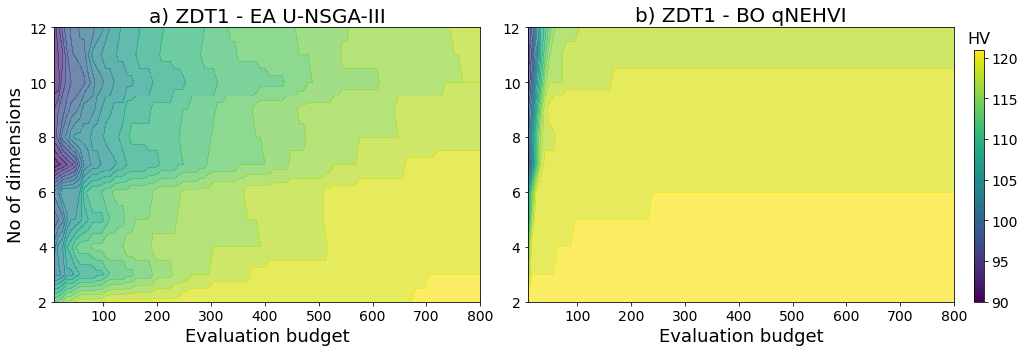

In [5]:
eval_plot = (np.arange(1,100+1,1)*8).tolist()
dim_plot = np.arange(2, 12+1, 1).tolist()
X, Y = np.meshgrid(eval_plot, dim_plot)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

norm = plt.Normalize(min(Z1.min(),Z2.min()), max(Z1.max(),Z2.min()))

contour = ax[0].contourf(X, Y, Z1, cmap=plt.cm.get_cmap('viridis'),
                        norm = norm, levels=25, alpha=0.7)
#ax[0].clabel(contour, inline=True, fontsize=10)
ax[0].set(xlabel='Evaluation budget', ylabel='No of dimensions')
ax[0].set_title("a) ZDT1 - EA U-NSGA-III", fontsize=20)


contour = ax[1].contourf(X, Y, Z2, cmap=plt.cm.get_cmap('viridis'),
                        norm = norm, levels=25, alpha=0.7)
#ax[1].clabel(contour, inline=True, fontsize=10)
ax[1].set(xlabel='Evaluation budget')
ax[1].set_title("b) ZDT1 - BO qNEHVI", fontsize=20)

fig.tight_layout()

sm =  ScalarMappable(norm=norm, cmap=cm)
sm.set_array([])
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.97, 0.15, 0.01, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.set_title("HV", fontsize=16)

In [41]:
fig.savefig('ZDT1_contour.pdf')

In [8]:
Z1 = loadtxt("ZDT2_contour_nsga3_100by8.csv", delimiter=',')
Z2 = loadtxt("ZDT2_contour_qnehvi_100by8.csv", delimiter=',')

Z1.shape, Z2.shape

((11, 100), (11, 100))

C:\Users\user\AppData\Local\Temp\ipykernel_40828\2174097409.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  contour = ax[0].contourf(X, Y, Z1, cmap=plt.cm.get_cmap('viridis'),
C:\Users\user\AppData\Local\Temp\ipykernel_40828\2174097409.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  contour = ax[1].contourf(X, Y, Z2, cmap=plt.cm.get_cmap('viridis'),


Text(0.5, 1.0, 'HV')

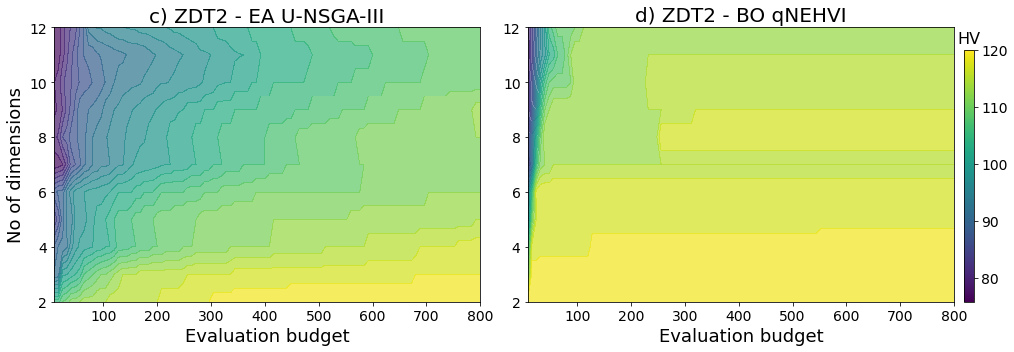

In [9]:
eval_plot = (np.arange(1,100+1,1)*8).tolist()
dim_plot = np.arange(2, 12+1, 1).tolist()
X, Y = np.meshgrid(eval_plot, dim_plot)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

norm = plt.Normalize(min(Z1.min(),Z2.min()), max(Z1.max(),Z2.min()))

contour = ax[0].contourf(X, Y, Z1, cmap=plt.cm.get_cmap('viridis'),
                        norm = norm, levels=25, alpha=0.7)
#ax[0].clabel(contour, inline=True, fontsize=10)
ax[0].set(xlabel='Evaluation budget', ylabel='No of dimensions')
ax[0].set_title("c) ZDT2 - EA U-NSGA-III", fontsize=20)


contour = ax[1].contourf(X, Y, Z2, cmap=plt.cm.get_cmap('viridis'),
                        norm = norm, levels=25, alpha=0.7)
#ax[1].clabel(contour, inline=True, fontsize=10)
ax[1].set(xlabel='Evaluation budget')
ax[1].set_title("d) ZDT2 - BO qNEHVI", fontsize=20)

fig.tight_layout()

sm =  ScalarMappable(norm=norm, cmap=cm)
sm.set_array([])
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.15, 0.01, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.set_title("HV", fontsize=16)

In [44]:
fig.savefig('ZDT2_contour.pdf')

In [10]:
Z1 = loadtxt("ZDT3_contour_nsga3_100by8.csv", delimiter=',')

Z2 = loadtxt("ZDT3_contour_qnehvi_100by8.csv", delimiter=',')

Z1.shape, Z2.shape

((11, 100), (11, 100))

C:\Users\user\AppData\Local\Temp\ipykernel_40828\2421216512.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  contour = ax[0].contourf(X, Y, Z1, cmap=plt.cm.get_cmap('viridis'),
C:\Users\user\AppData\Local\Temp\ipykernel_40828\2421216512.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  contour = ax[1].contourf(X, Y, Z2, cmap=plt.cm.get_cmap('viridis'),


Text(0.5, 1.0, 'HV')

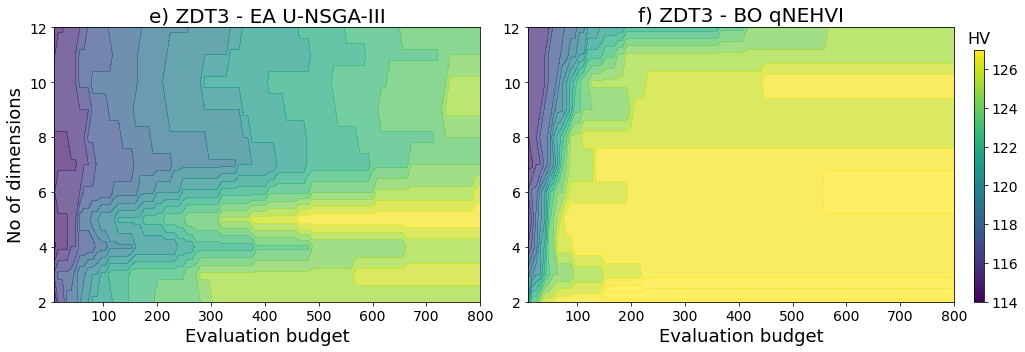

In [11]:
eval_plot = (np.arange(1,100+1,1)*8).tolist()
dim_plot = np.arange(2, 12+1, 1).tolist()
X, Y = np.meshgrid(eval_plot, dim_plot)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

norm = plt.Normalize(min(Z1.min(),Z2.min()), max(Z1.max(),Z2.min()))

contour = ax[0].contourf(X, Y, Z1, cmap=plt.cm.get_cmap('viridis'),
                        norm = norm, levels=20, alpha=0.7)
#ax[0].clabel(contour, inline=True, fontsize=10)
ax[0].set(xlabel='Evaluation budget', ylabel='No of dimensions')
ax[0].set_title("e) ZDT3 - EA U-NSGA-III", fontsize=20)


contour = ax[1].contourf(X, Y, Z2, cmap=plt.cm.get_cmap('viridis'),
                        norm = norm, levels=20, alpha=0.7)
#ax[1].clabel(contour, inline=True, fontsize=10)
ax[1].set(xlabel='Evaluation budget')
ax[1].set_title("f) ZDT3 - BO qNEHVI", fontsize=20)

fig.tight_layout()

sm =  ScalarMappable(norm=norm, cmap=cm)
sm.set_array([])
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.97, 0.15, 0.01, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.set_title("HV", fontsize=16)

In [47]:
fig.savefig('ZDT3_contour.pdf')

In [4]:
Z1 = loadtxt("MW7_contour_nsga3_100by8_dim2to15.csv", delimiter=',')
Z1 = Z1[0:11]

Z2_1 = loadtxt("MW7_contour_qnehvi_100by8_dim2to4.csv", delimiter=',')
Z2_2 = loadtxt("MW7_contour_qnehvi_100by8_dim5to6.csv", delimiter=',')
Z2_3 = loadtxt("MW7_contour_qnehvi_100by8_dim7to8.csv", delimiter=',')
Z2_4 = loadtxt("MW7_contour_qnehvi_100by8_dim9to10.csv", delimiter=',')
Z2_5 = loadtxt("MW7_contour_qnehvi_100by8_dim11to12.csv", delimiter=',')

Z2 = np.vstack([Z2_1, Z2_2, Z2_3, Z2_4, Z2_5])

Z1.shape, Z2.shape

((11, 100), (11, 100))

C:\Users\user\AppData\Local\Temp\ipykernel_28372\560347123.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  contour = ax[0].contourf(X, Y, Z1, cmap=plt.cm.get_cmap('viridis'),
C:\Users\user\AppData\Local\Temp\ipykernel_28372\560347123.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  contour = ax[1].contourf(X, Y, Z2, cmap=plt.cm.get_cmap('viridis'),


Text(0.5, 1.0, 'HV')

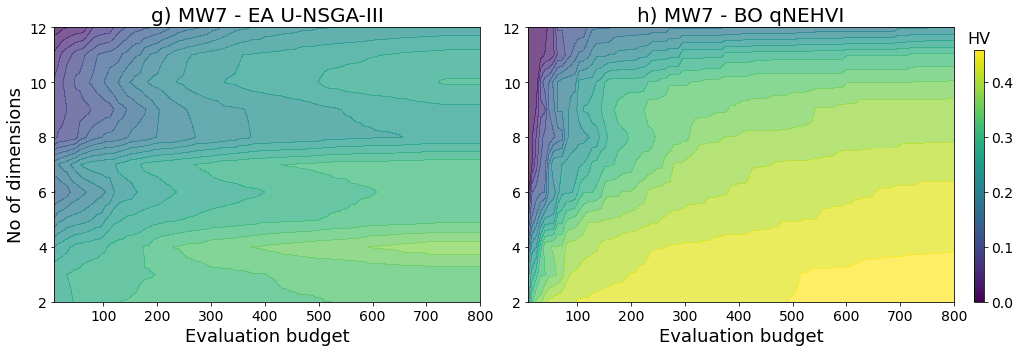

In [5]:
eval_plot = (np.arange(1,100+1,1)*8).tolist()
dim_plot = np.arange(2, 12+1, 1).tolist()
X, Y = np.meshgrid(eval_plot, dim_plot)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

norm = plt.Normalize(min(Z1.min(),Z2.min()), max(Z1.max(), Z2.max()))

contour = ax[0].contourf(X, Y, Z1, cmap=plt.cm.get_cmap('viridis'),
                        norm = norm, levels=20, alpha=0.7)
#ax[0].clabel(contour, inline=True, fontsize=10)
ax[0].set(xlabel='Evaluation budget', ylabel='No of dimensions')
ax[0].set_title("g) MW7 - EA U-NSGA-III", fontsize=20)

contour = ax[1].contourf(X, Y, Z2, cmap=plt.cm.get_cmap('viridis'),
                        norm = norm, levels=20, alpha=0.7)
#ax[1].clabel(contour, inline=True, fontsize=10)
ax[1].set(xlabel='Evaluation budget')
ax[1].set_title("h) MW7 - BO qNEHVI", fontsize=20)

fig.tight_layout()

sm =  ScalarMappable(norm=norm, cmap=cm)
sm.set_array([])
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.97, 0.15, 0.01, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.set_title("HV", fontsize=16)

In [50]:
fig.savefig('MW7_contour.pdf')

C:\Users\user\AppData\Local\Temp\ipykernel_15376\3082186860.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  contour = ax[0].contourf(X, Y, Z1, cmap=plt.cm.get_cmap('viridis'),
C:\Users\user\AppData\Local\Temp\ipykernel_15376\3082186860.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  contour = ax[1].contourf(X, Y, Z2, cmap=plt.cm.get_cmap('viridis'),
C:\Users\user\AppData\Local\Temp\ipykernel_15376\3082186860.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set(xticklabels=[0, 100, 200])


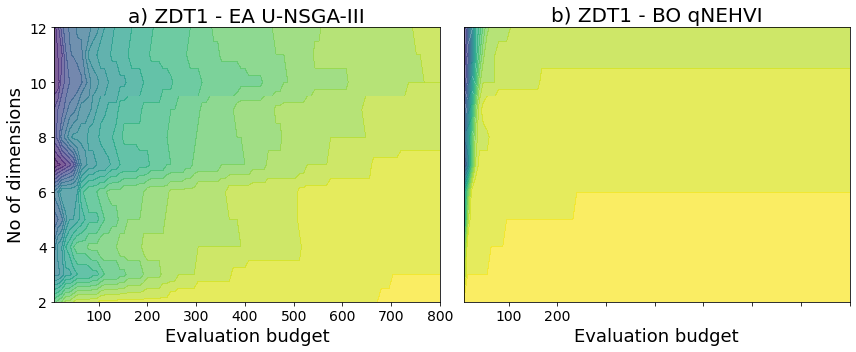

In [17]:
max_hv = 121.01

Z1 = loadtxt("ZDT1_contour_nsga3_100by8.csv", delimiter=',')
#Z1_plot = -np.log10(max_hv - np.asarray(Z1)) 
Z2 = loadtxt("ZDT1_contour_qnehvi_100by8.csv", delimiter=',')
#Z2_plot = -np.log10(max_hv - np.asarray(Z2)) 

Z1.shape, Z2.shape

eval_plot = (np.arange(1,100+1,1)*8).tolist()
dim_plot = np.arange(2, 12+1, 1).tolist()
X, Y = np.meshgrid(eval_plot, dim_plot)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

norm = plt.Normalize(min(Z1.min(),Z2.min()), max(Z1.max(),Z2.min()))

contour = ax[0].contourf(X, Y, Z1, cmap=plt.cm.get_cmap('viridis'),
                        norm = norm, levels=25, alpha=0.7)

ax[0].set(xlabel='Evaluation budget', ylabel='No of dimensions')
ax[0].set_title("a) ZDT1 - EA U-NSGA-III", fontsize=20)


contour = ax[1].contourf(X, Y, Z2, cmap=plt.cm.get_cmap('viridis'),
                        norm = norm, levels=25, alpha=0.7)

ax[1].set(xlabel='Evaluation budget')
ax[1].tick_params(left=False)
ax[1].set(yticklabels=[]) 
ax[1].set(xticklabels=[0,100, 200, 300, 400, 500]) 
ax[1].set_title("b) ZDT1 - BO qNEHVI", fontsize=20)

fig.tight_layout()